In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import pickle

In [23]:
df = pd.read_csv("bank_marketing_dataset.csv")


In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
df.shape

(41188, 21)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [27]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

## data types for all the columns

In [28]:
obj_col = []
num_col = []

def check_data_types(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtypes=='object':
            obj_col.append(i)

        else:
            num_col.append(i)

    print(obj_col)
    print()
    print(num_col)

In [29]:
check_data_types(df)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribed']

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Check Numerical And Categorical Cols

In [30]:
# var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
#                   "poutcome"]
# var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
#                 "euribor3m", "nr.employed"]
# print(len(var_categorical), len(var_numerical))

In [31]:
def cat_num_col(dataframe,count):
    global cat_cols
    global num_cols
    cat_cols = []
    num_cols = []
    for i in dataframe.columns:
        if len(dataframe[i].value_counts())>count:
            num_cols.append(i)
            
        else:
            cat_cols.append(i)
    
    print(cat_cols)
    print()
    print(num_cols)
            

In [32]:
cat_num_col(df,15)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'emp.var.rate', 'nr.employed', 'subscribed']

['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


## EDA

In [33]:
df.describe().style.background_gradient()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

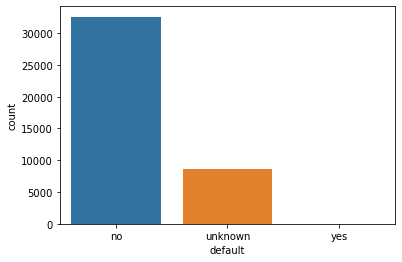

In [35]:
sns.countplot(df['default'])

In [36]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

#### As default col will not get affected on whether client will subscribe or not so we will drop it

In [37]:
df = df.drop(['default'],axis=1)

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

### Univariate

In [39]:
# cat_columns = ['job',
#  'marital',
#  'education',
#  'housing',
#  'loan',
#  'contact',
#  'month',
#  'day_of_week',
#  'previous',
#  'poutcome',
#  'emp.var.rate',
#  'nr.employed',
#  'subscribed']
# for i in df[cat_columns]:
#     plt.figure(figsize=(11,9))
#     sns.countplot(df[i])
#     plt.show()

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [41]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

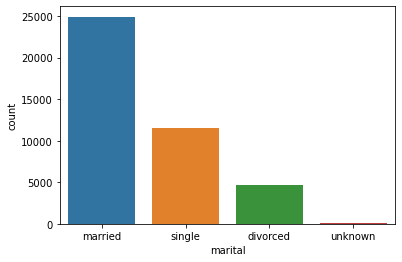

In [42]:
sns.countplot(df['marital'])

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

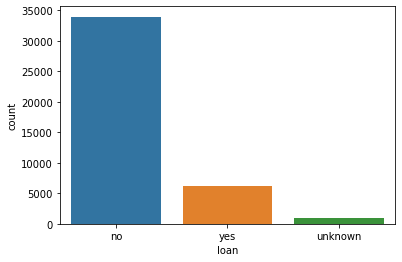

In [43]:
sns.countplot(df['loan'])

#### As we can see the unknown are very is in values so we will replace it with yes

In [44]:
df['loan'] = df['loan'].replace({'unknown':'yes'})

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

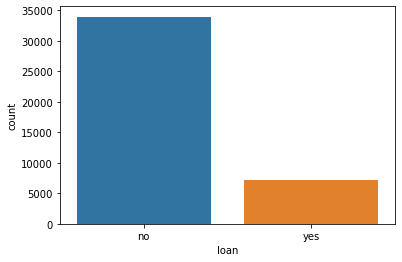

In [45]:
sns.countplot(df['loan'])

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


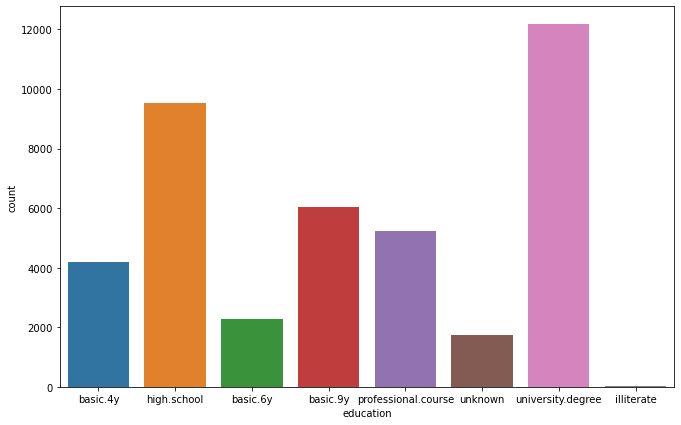

In [46]:
plt.figure(figsize=(11,7))
sns.countplot(df['education'])
plt.show()

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

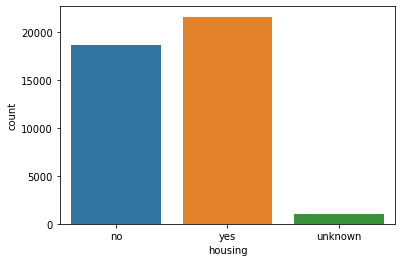

In [47]:
sns.countplot(df['housing'])

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

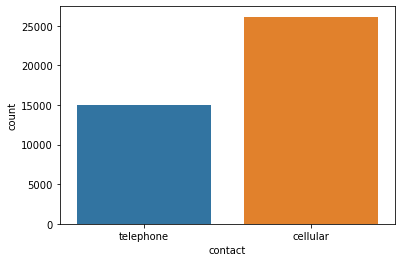

In [48]:
sns.countplot(df['contact'])

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

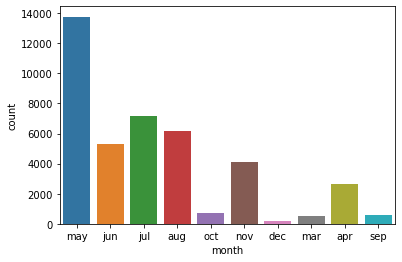

In [49]:
sns.countplot(df['month'])

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

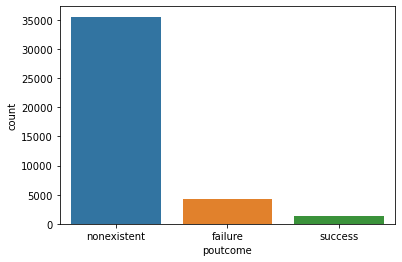

In [50]:
sns.countplot(df['poutcome'])

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subscribed', ylabel='count'>

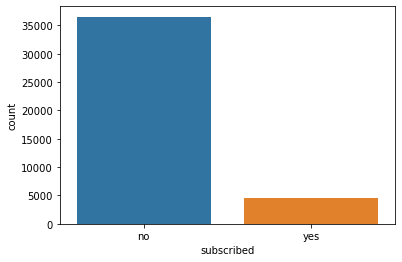

In [51]:
sns.countplot(df['subscribed'])

### BiVariate

In [52]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [53]:
df.groupby(by='subscribed').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
subscribed,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [54]:
pd.crosstab(df['job'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False)

subscribed,no,yes
job,,
student,0.685714,0.314286
retired,0.747674,0.252326
unemployed,0.857988,0.142012
admin.,0.870274,0.129726
management,0.887825,0.112175
unknown,0.887879,0.112121
technician,0.891740,0.108260
self-employed,0.895144,0.104856
housemaid,0.900000,0.100000


<AxesSubplot:ylabel='job'>

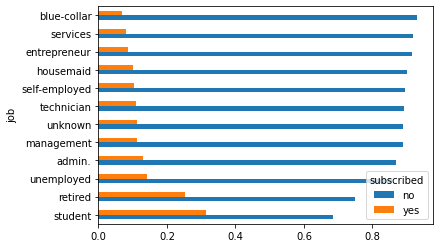

In [55]:
pd.crosstab(df['job'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False).plot(kind='barh')

#### Here we can say that students has mostly subscribed than blue collar customers

In [56]:
pd.crosstab(df['marital'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False)

subscribed,no,yes
marital,,
unknown,0.850000,0.150000
single,0.859959,0.140041
divorced,0.896791,0.103209
married,0.898427,0.101573


<AxesSubplot:ylabel='marital'>

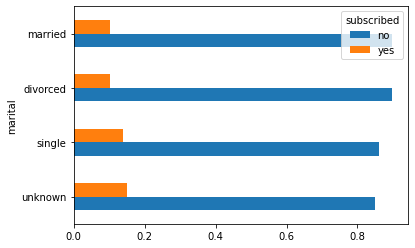

In [57]:
pd.crosstab(df['marital'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False).plot(kind='barh')

<AxesSubplot:ylabel='education'>

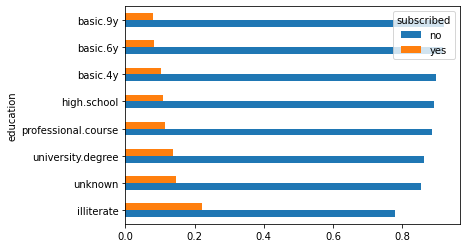

In [58]:
pd.crosstab(df['education'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False).plot(kind='barh')

<AxesSubplot:ylabel='housing'>

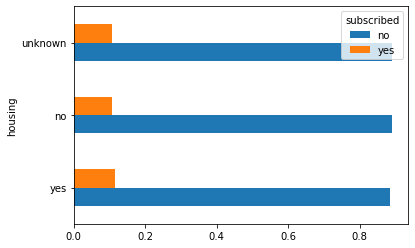

In [59]:
pd.crosstab(df['housing'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False).plot(kind='barh')

<AxesSubplot:ylabel='poutcome'>

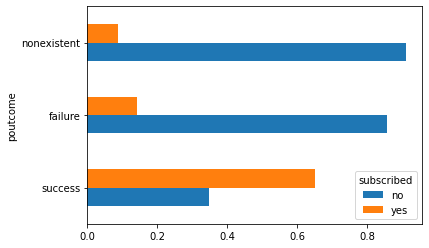

In [60]:
pd.crosstab(df['poutcome'],df['subscribed'],normalize='index').sort_values(by='yes',ascending=False).plot(kind='barh')

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


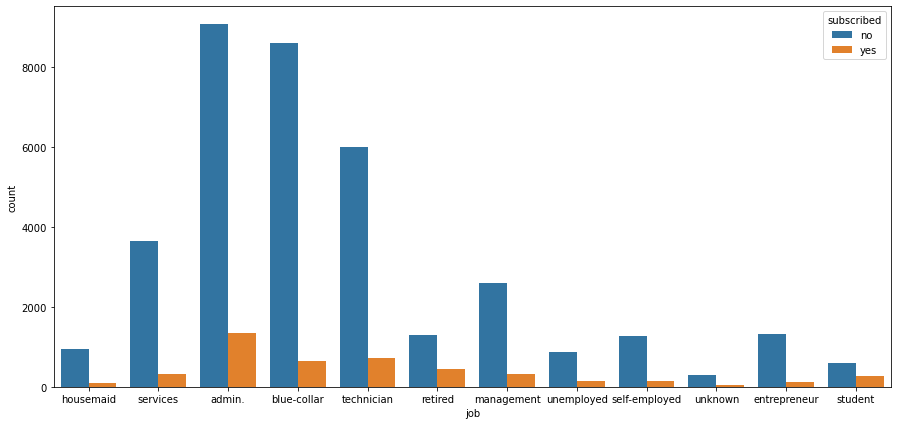

In [61]:
plt.figure(figsize=(15,7))
sns.countplot(df['job'],hue=df['subscribed'])
plt.show()

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


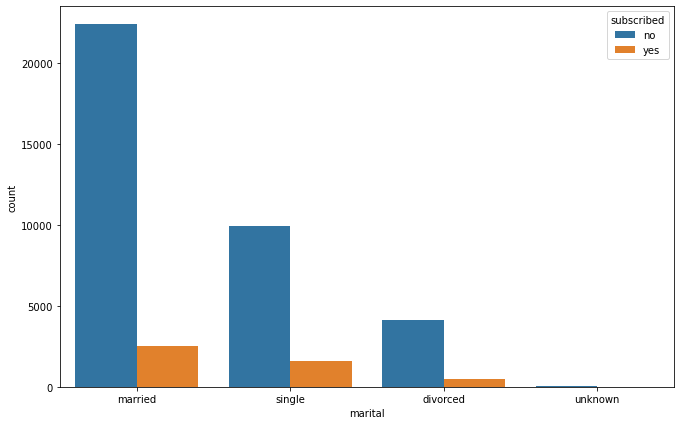

In [62]:
plt.figure(figsize=(11,7))
sns.countplot(df['marital'],hue=df['subscribed'])
plt.show()

### MultiVarriate

<Figure size 936x504 with 0 Axes>

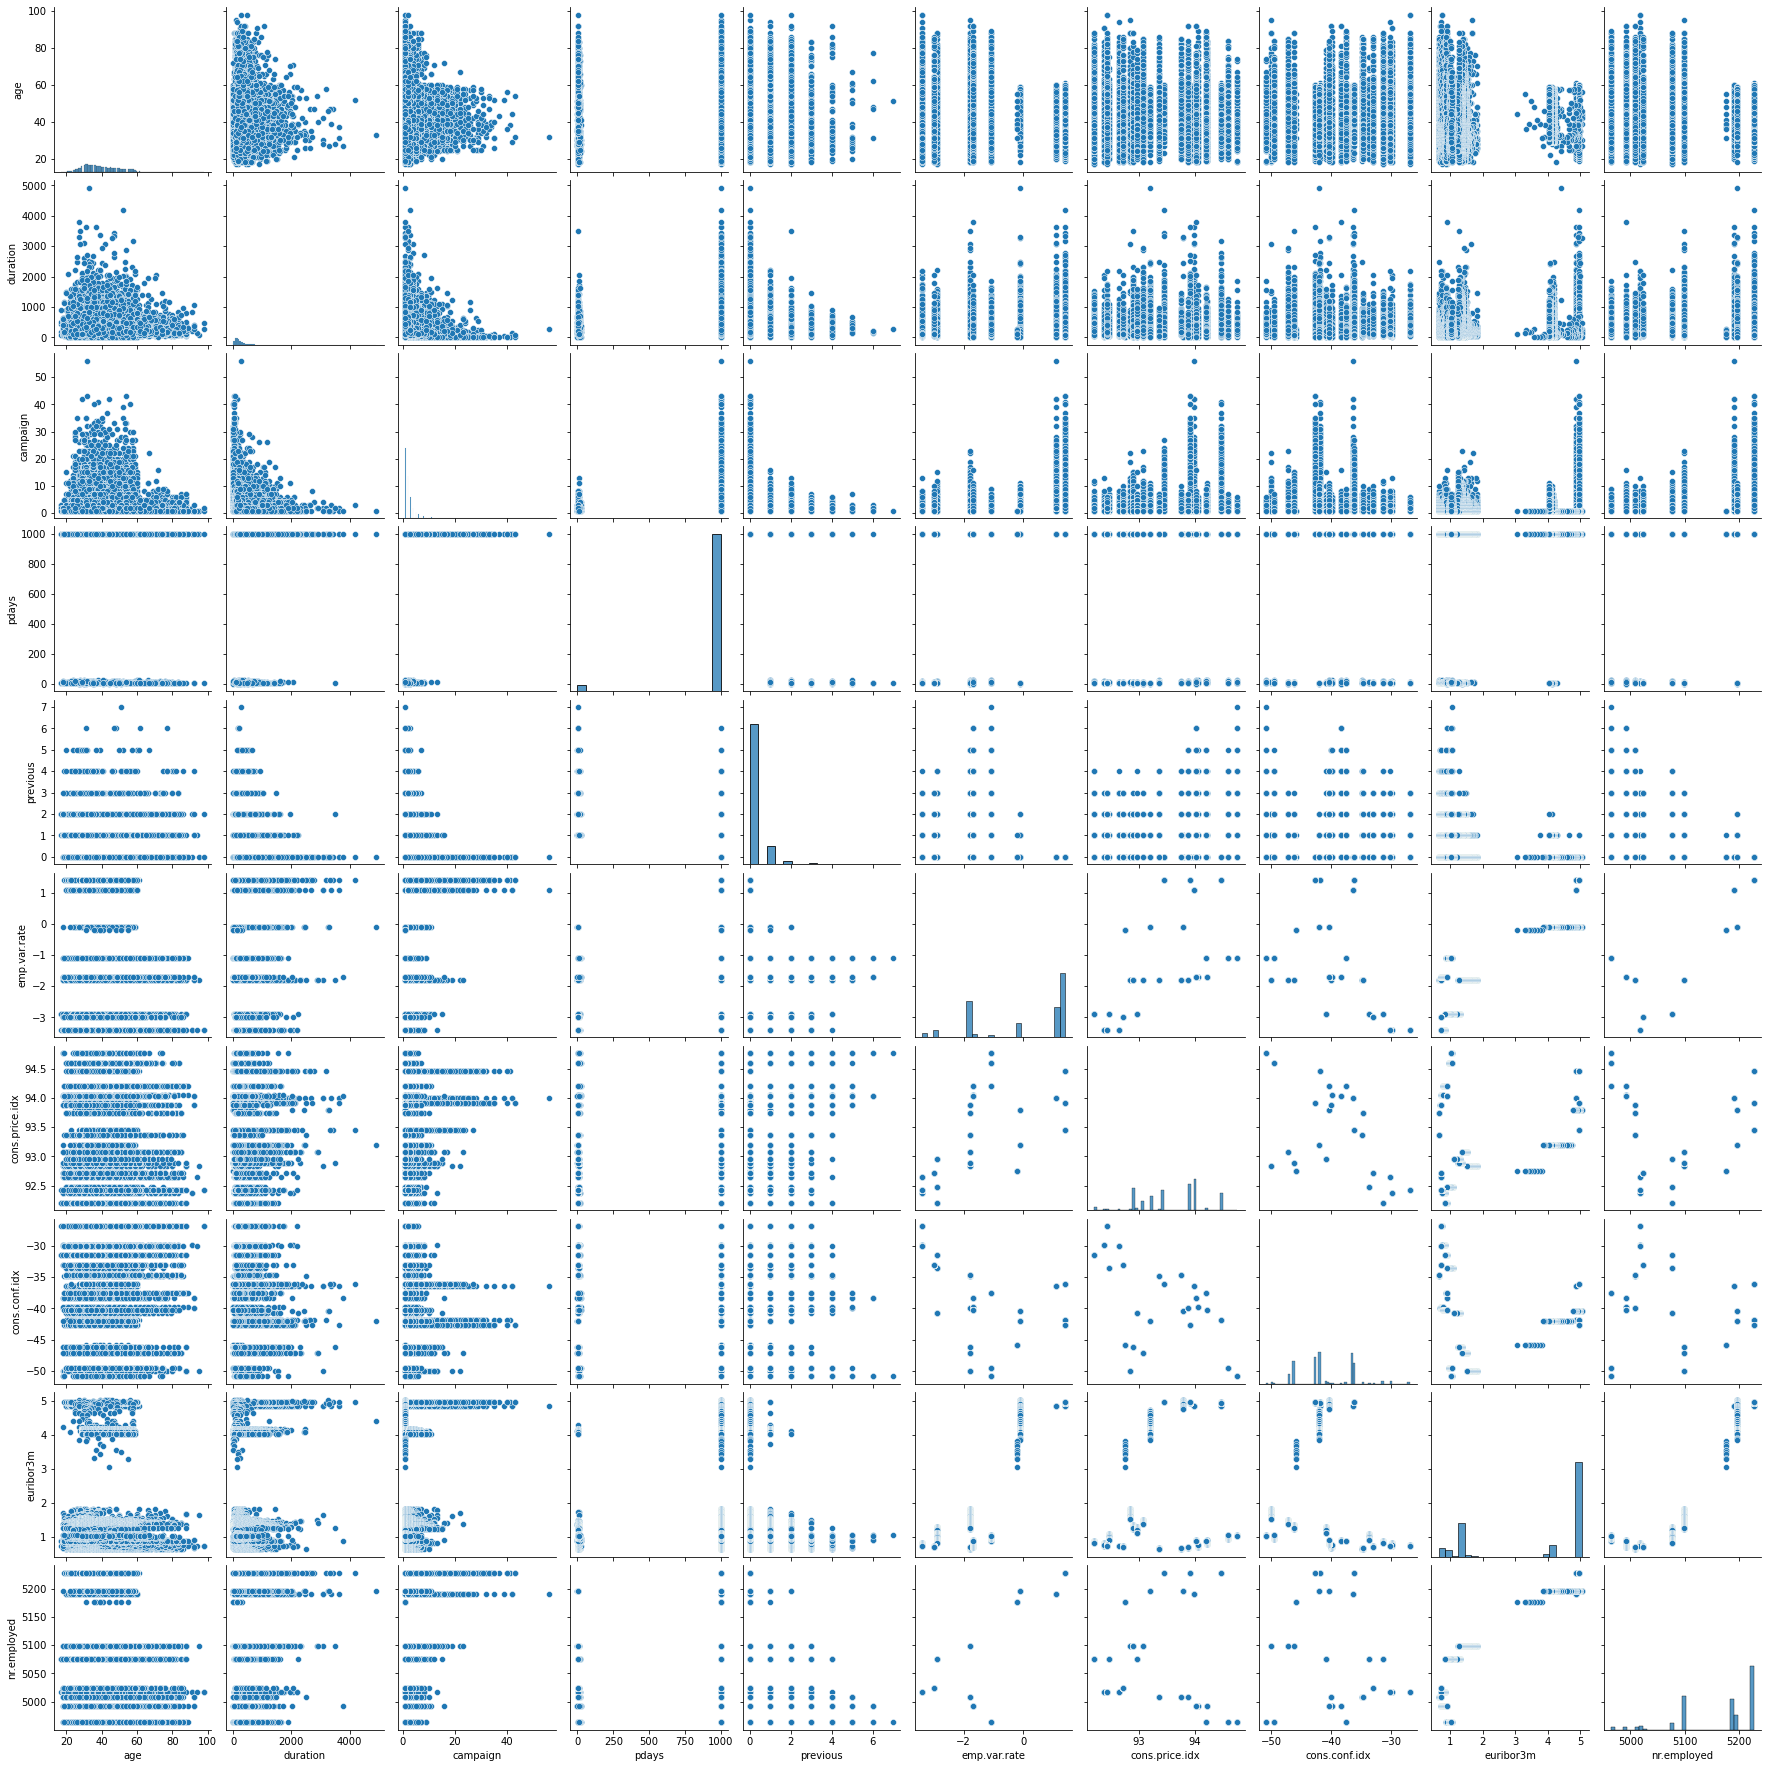

In [63]:
plt.figure(figsize=(13,7))
sns.pairplot(data=df)

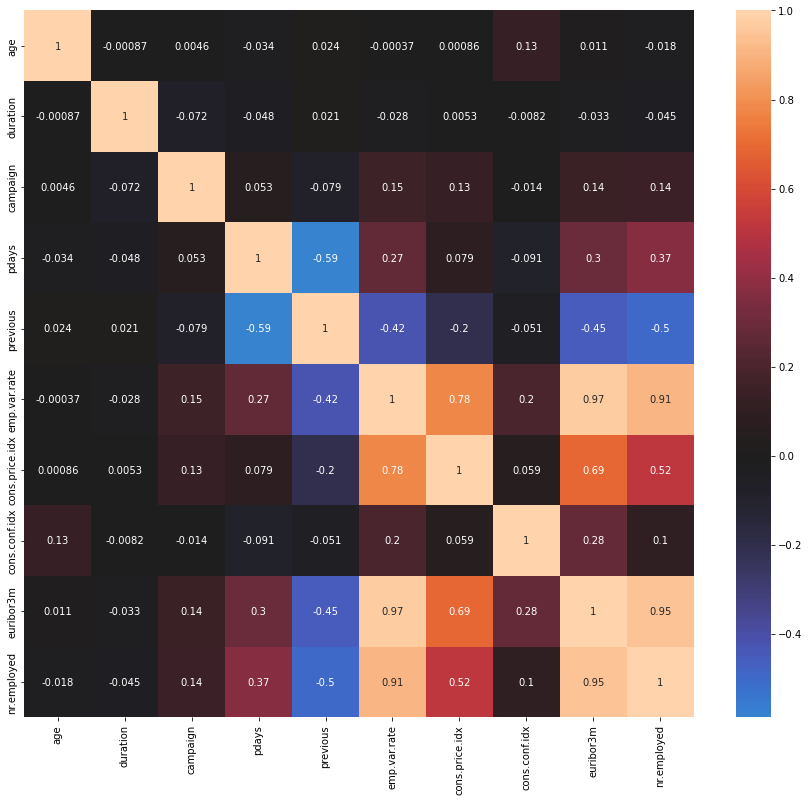

In [64]:
plt.figure(figsize=(15,13))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

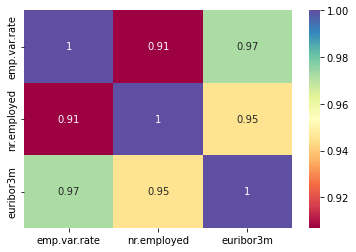

In [65]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

In [66]:
'''
Euribor is the acronym for the Euro Interbank Offered Rate. 
This is the interest rate at which credit institutions lend money to each other, 
which is often referred to as “the price of money”.

With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' 
(number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 
'nr.employed' as 'euribor' also give us the price of money in current market.
'''

"\nEuribor is the acronym for the Euro Interbank Offered Rate. \nThis is the interest rate at which credit institutions lend money to each other, \nwhich is often referred to as “the price of money”.\n\nWith this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' \n(number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and \n'nr.employed' as 'euribor' also give us the price of money in current market.\n"

In [67]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

#### As we can see 'emp.var.rate' 'nr.employed' and 'euribor3m' are highly corelated to each other so to avoid multicolinearity we will drop 'emp.var.rate','nr.employed' cols from dataset 

In [68]:
df = df.drop(['emp.var.rate','nr.employed'],axis=1)

## Check Outliers

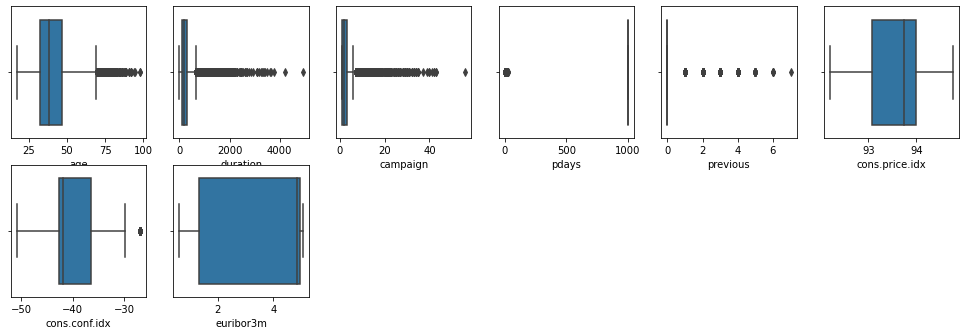

In [69]:
plt.figure(figsize=(17, 17))
for i, col in enumerate(df.drop(['subscribed'],axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(6,6, i+1)
    sns.boxplot(data=df, x=col, ax=ax)


### Handling Outliers

In [70]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

#### 999 means client was not previously called so we will make it to 0

In [71]:
df['pdays'] = df['pdays'].replace({999:0})

In [72]:
df['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [73]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

#### here we have basic.9y,basic.4y and basic.6y so we will convert it into middle.school and illiterate

In [74]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

middle.school          12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [75]:
df['education'] = df['education'].replace({'illiterate':'unknown'})

In [76]:
df['education'].value_counts()

middle.school          12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1749
Name: education, dtype: int64

In [77]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [78]:
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

#### As lots of calls were made during campaign so we will make calls greater than 7 to 7

In [79]:
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)

In [80]:
df['campaign'].value_counts()

1    17642
2    10570
3     5341
4     2651
8     1777
5     1599
6      979
7      629
Name: campaign, dtype: int64

In [81]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

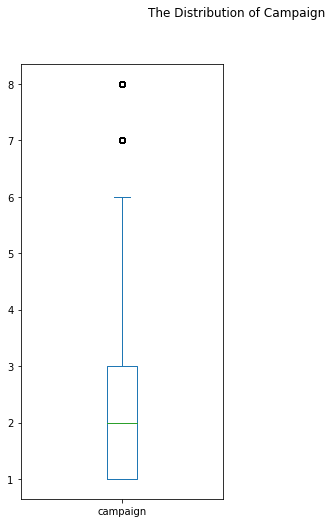

In [82]:
df[['campaign']].plot(kind = 'box', figsize = (8,8),subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Campaign')
plt.show()

### Converting Target Col into numerical

In [83]:
df['subscribed'] = df['subscribed'].replace({'yes':1,'no':0})

In [84]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,subscribed
0,56,housemaid,married,middle.school,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,4.857,0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,4.857,0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,4.857,0
3,40,admin.,married,middle.school,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,4.857,0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,4.857,0


### Encoding The Categorical Features

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
cat_columns = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']


In [87]:
le = LabelEncoder()

In [88]:
for i in cat_columns:  
    df[i] = le.fit_transform(df[i])

In [89]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,subscribed
0,56,3,1,1,0,0,1,6,1,261,1,0,0,1,93.994,-36.4,4.857,0
1,57,7,1,0,0,0,1,6,1,149,1,0,0,1,93.994,-36.4,4.857,0
2,37,7,1,0,2,0,1,6,1,226,1,0,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,1,6,1,151,1,0,0,1,93.994,-36.4,4.857,0
4,56,7,1,0,0,1,1,6,1,307,1,0,0,1,93.994,-36.4,4.857,0


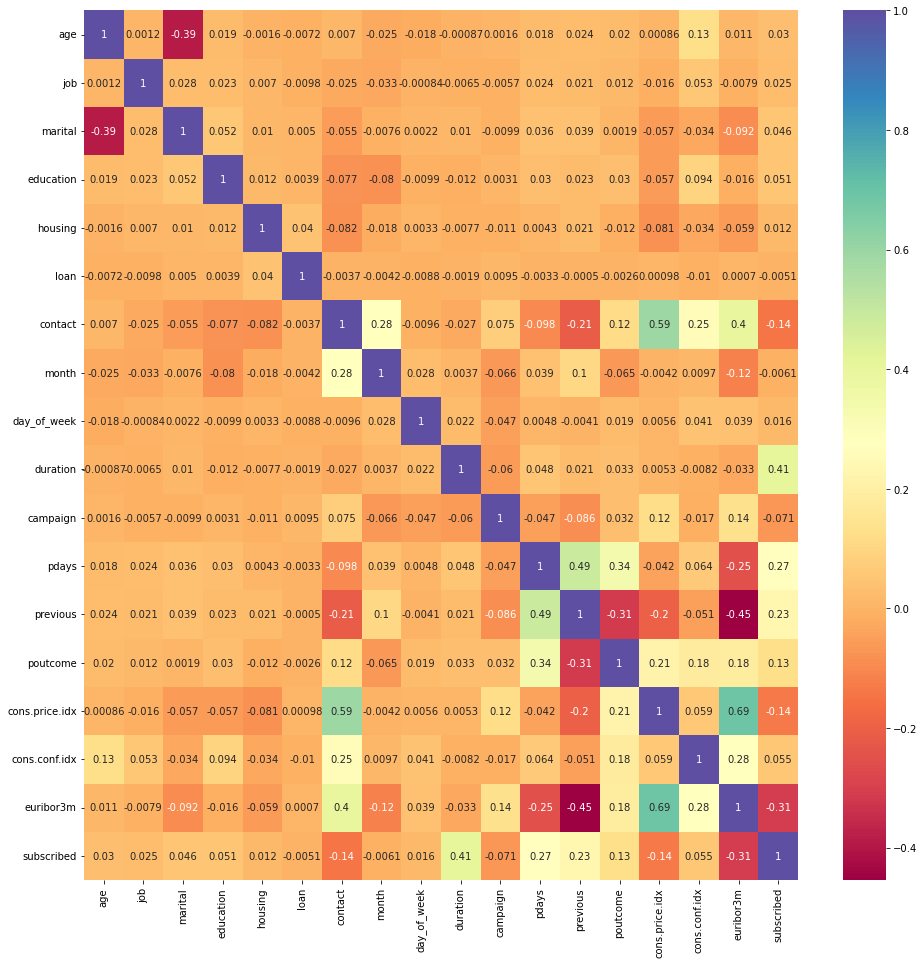

In [90]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [91]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
subscribed          int64
dtype: object

In [92]:
len(df.dtypes)

18

### Check Distribution Of Data

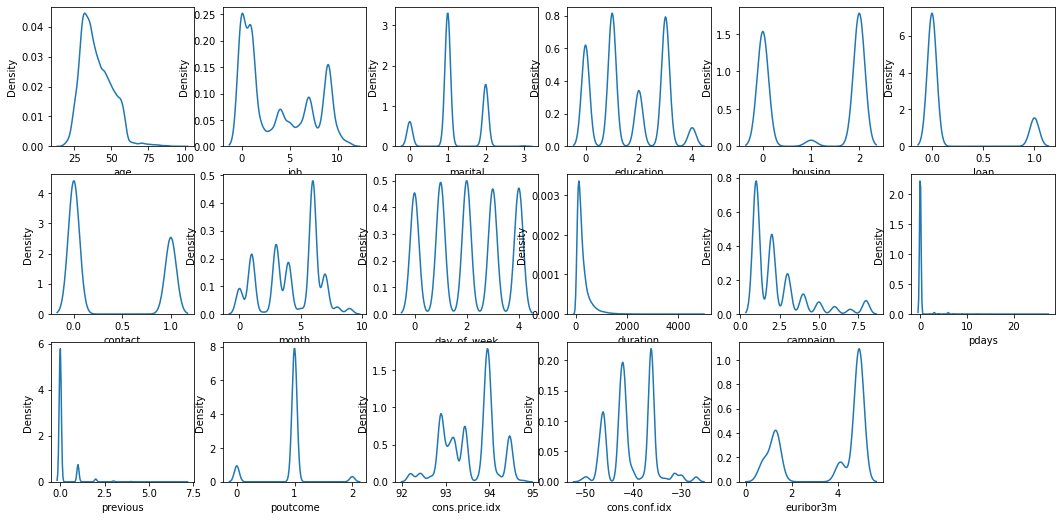

In [93]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['subscribed'],axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(6,6, i+1)
    sns.kdeplot(data=df, x=col, ax=ax)


### Split the data 

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop(['subscribed'],axis=1)
y = df['subscribed']

In [96]:
print(X.shape)
print(y.shape)

(41188, 17)
(41188,)


### Scaling the data

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scalar = StandardScaler()
scaled_arr = scalar.fit_transform(X)

In [99]:
X = pd.DataFrame(scaled_arr,columns=X.columns)

In [100]:
X

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,-0.201579,-0.283741,-0.494468,-1.087707,-0.461731,1.31827,0.762558,-0.718834,0.010471,-0.753583,-0.164012,-0.349494,0.192622,0.722722,0.886447,0.712460
1,1.628993,0.911227,-0.283741,-1.299104,-1.087707,-0.461731,1.31827,0.762558,-0.718834,-0.421501,-0.753583,-0.164012,-0.349494,0.192622,0.722722,0.886447,0.712460
2,-0.290186,0.911227,-0.283741,-1.299104,0.942127,-0.461731,1.31827,0.762558,-0.718834,-0.124520,-0.753583,-0.164012,-0.349494,0.192622,0.722722,0.886447,0.712460
3,-0.002309,-1.036184,-0.283741,-0.494468,-1.087707,-0.461731,1.31827,0.762558,-0.718834,-0.413787,-0.753583,-0.164012,-0.349494,0.192622,0.722722,0.886447,0.712460
4,1.533034,0.911227,-0.283741,-1.299104,-1.087707,2.165761,1.31827,0.762558,-0.718834,0.187888,-0.753583,-0.164012,-0.349494,0.192622,0.722722,0.886447,0.712460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.354824,-0.283741,0.310168,0.942127,-0.461731,-0.75857,1.193593,-1.434368,0.292025,-0.753583,-0.164012,-0.349494,0.192622,2.058168,-2.224953,-1.495186
41184,0.573445,-0.757982,-0.283741,0.310168,-1.087707,-0.461731,-0.75857,1.193593,-1.434368,0.481012,-0.753583,-0.164012,-0.349494,0.192622,2.058168,-2.224953,-1.495186
41185,1.533034,0.354824,-0.283741,1.114804,0.942127,-0.461731,-0.75857,1.193593,-1.434368,-0.267225,-0.206252,-0.164012,-0.349494,0.192622,2.058168,-2.224953,-1.495186
41186,0.381527,1.467630,-0.283741,0.310168,-1.087707,-0.461731,-0.75857,1.193593,-1.434368,0.708569,-0.753583,-0.164012,-0.349494,0.192622,2.058168,-2.224953,-1.495186


In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 17)
(8238, 17)
(32950,)
(8238,)


### Balancing the target Column

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
sm = SMOTE(random_state=27)

In [105]:
# applying it to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [106]:
y_train_smote.value_counts()

0    29236
1    29236
Name: subscribed, dtype: int64

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subscribed', ylabel='count'>

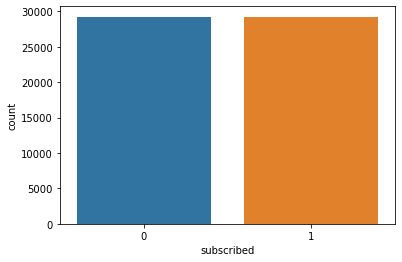

In [107]:
sns.countplot(y_train_smote)

In [108]:
X_train_smote.shape

(58472, 17)

### Build Modelling

In [109]:
all_model_dict = {}

In [110]:
# Dataframe
# accuracy score of train, accuracy score of test, f1_score of train, f1_score of test, 
# recall_of train,recallOfTest  precision_Of Train, precisionOfTest

### Logistic Regression

In [111]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_smote,y_train_smote)
y_predict_lr_test = lr_model.predict(X_test)
y_predict_lr_train = lr_model.predict(X_train_smote)

In [112]:
all_model_dict['Logistic Regression'] = [np.around(accuracy_score(y_train_smote,y_predict_lr_train),2),
                                         np.around(accuracy_score(y_test,y_predict_lr_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_lr_train),2),
                                         np.around(f1_score(y_test,y_predict_lr_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_lr_train),2),
                                         np.around(recall_score(y_test,y_predict_lr_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_lr_train),2),
                                         np.around(precision_score(y_test,y_predict_lr_test),2)
                                        ]

In [113]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42]}

### DecisionTree Classifier

In [114]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_smote,y_train_smote)
y_predict_dtree_test = dtree.predict(X_test)
y_predict_dtree_train = dtree.predict(X_train_smote)

In [115]:
all_model_dict['Decision Tree'] = [np.around(accuracy_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(accuracy_score(y_test,y_predict_dtree_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(f1_score(y_test,y_predict_dtree_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(recall_score(y_test,y_predict_dtree_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(precision_score(y_test,y_predict_dtree_test),2)
                                        ]

In [116]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42],
 'Decision Tree': [1.0, 0.88, 1.0, 0.52, 1.0, 0.58, 1.0, 0.48]}

### Hyperparameter Tuning For DecisionTree

In [117]:
parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': np.arange(6,12),
    'min_samples_split': np.arange(6,12),
    'min_samples_leaf':np.arange(6,12)
}

In [118]:
rd_dtree = RandomizedSearchCV(dtree,parameters,cv=3)
rd_dtree.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 6,  7,  8,  9, 10, 11]),
                                        'splitter': ['best', 'random']})

In [119]:
rd_dtree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=11,
                       min_samples_split=9)

In [120]:
dtree_hyp = DecisionTreeClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=6)
dtree_hyp.fit(X_train_smote,y_train_smote)
y_predict_dtree_test = dtree_hyp.predict(X_test)
y_predict_dtree_train = dtree_hyp.predict(X_train_smote)

In [121]:
all_model_dict['Decision Tree'] = [np.around(accuracy_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(accuracy_score(y_test,y_predict_dtree_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(f1_score(y_test,y_predict_dtree_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(recall_score(y_test,y_predict_dtree_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_dtree_train),2),
                                         np.around(precision_score(y_test,y_predict_dtree_test),2)
                                        ]

In [122]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42],
 'Decision Tree': [0.93, 0.87, 0.94, 0.58, 0.96, 0.77, 0.91, 0.47]}

### KNN Classifier

In [123]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote,y_train_smote)
y_predict_knn_test = knn.predict(X_test)
y_predict_knn_train = knn.predict(X_train_smote)

In [124]:
all_model_dict['KNN Classifier'] = [np.around(accuracy_score(y_train_smote,y_predict_knn_train),2),
                                         np.around(accuracy_score(y_test,y_predict_knn_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_knn_train),2),
                                         np.around(f1_score(y_test,y_predict_knn_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_knn_train),2),
                                         np.around(recall_score(y_test,y_predict_knn_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_knn_train),2),
                                         np.around(precision_score(y_test,y_predict_knn_test),2)
                                        ]

In [125]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42],
 'Decision Tree': [0.93, 0.87, 0.94, 0.58, 0.96, 0.77, 0.91, 0.47],
 'KNN Classifier': [0.95, 0.85, 0.95, 0.53, 1.0, 0.75, 0.9, 0.42]}

### RandomForest Classifier

In [126]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=34)
rf_clf.fit(X_train_smote,y_train_smote)
y_predict_rf_test = rf_clf.predict(X_test)
y_predict_rf_train = rf_clf.predict(X_train_smote)

In [127]:
all_model_dict['RandomForest Classifier'] = [np.around(accuracy_score(y_train_smote,y_predict_rf_train),2),
                                         np.around(accuracy_score(y_test,y_predict_rf_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_rf_train),2),
                                         np.around(f1_score(y_test,y_predict_rf_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_rf_train),2),
                                         np.around(recall_score(y_test,y_predict_rf_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_rf_train),2),
                                         np.around(precision_score(y_test,y_predict_rf_test),2)
                                        ]

In [128]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42],
 'Decision Tree': [0.93, 0.87, 0.94, 0.58, 0.96, 0.77, 0.91, 0.47],
 'KNN Classifier': [0.95, 0.85, 0.95, 0.53, 1.0, 0.75, 0.9, 0.42],
 'RandomForest Classifier': [1.0, 0.9, 1.0, 0.61, 1.0, 0.67, 1.0, 0.56]}

### HyperParameter Tuning For RandomForest

In [129]:
hyp = {'n_estimators':np.arange(20,150),
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3,10),
    'min_samples_split':np.arange(5,15),
    'min_samples_leaf':np.arange(3,10)}

In [130]:
rscv_rf_model = RandomizedSearchCV(rf_clf, hyp, cv = 3)
rscv_rf_model.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    random_state=34),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  3...
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101

In [131]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=32, random_state=34)

In [132]:
rf_clf_model = RandomForestClassifier(criterion='entropy',max_depth=9, max_samples=0.75,
                min_samples_leaf=6, min_samples_split=13, n_estimators=85, n_jobs=-1,
                       oob_score=True, random_state=34)
rf_clf_model.fit(X_train_smote,y_train_smote)
y_predict_rf_model_test = rf_clf_model.predict(X_test)
y_predict_rf_model_train = rf_clf_model.predict(X_train_smote)

In [133]:
all_model_dict['RandomForest Classifier'] = [np.around(accuracy_score(y_train_smote,y_predict_rf_model_train),2),
                                         np.around(accuracy_score(y_test,y_predict_rf_model_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_rf_model_train),2),
                                         np.around(f1_score(y_test,y_predict_rf_model_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_rf_model_train),2),
                                         np.around(recall_score(y_test,y_predict_rf_model_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_rf_model_train),2),
                                         np.around(precision_score(y_test,y_predict_rf_model_test),2)
                                        ]

In [134]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42],
 'Decision Tree': [0.93, 0.87, 0.94, 0.58, 0.96, 0.77, 0.91, 0.47],
 'KNN Classifier': [0.95, 0.85, 0.95, 0.53, 1.0, 0.75, 0.9, 0.42],
 'RandomForest Classifier': [0.92, 0.87, 0.92, 0.6, 0.97, 0.9, 0.88, 0.45]}

### XGBoost

In [135]:
xg_clf = XGBClassifier()
xg_clf.fit(X_train_smote,y_train_smote)
y_predict_xg_test = xg_clf.predict(X_test)
y_predict_xg_train = xg_clf.predict(X_train_smote)

In [136]:
all_model_dict['XGBoost Classifier'] = [np.around(accuracy_score(y_train_smote,y_predict_xg_train),2),
                                         np.around(accuracy_score(y_test,y_predict_xg_test),2),
                                         np.around(f1_score(y_train_smote,y_predict_xg_train),2),
                                         np.around(f1_score(y_test,y_predict_xg_test),2),
                                         np.around(recall_score(y_train_smote,y_predict_xg_train),2),
                                         np.around(recall_score(y_test,y_predict_xg_test),2),
                                         np.around(precision_score(y_train_smote,y_predict_xg_train),2),
                                         np.around(precision_score(y_test,y_predict_xg_test),2)
                                        ]

In [137]:
all_model_dict

{'Logistic Regression': [0.86, 0.85, 0.87, 0.56, 0.87, 0.85, 0.86, 0.42],
 'Decision Tree': [0.93, 0.87, 0.94, 0.58, 0.96, 0.77, 0.91, 0.47],
 'KNN Classifier': [0.95, 0.85, 0.95, 0.53, 1.0, 0.75, 0.9, 0.42],
 'RandomForest Classifier': [0.92, 0.87, 0.92, 0.6, 0.97, 0.9, 0.88, 0.45],
 'XGBoost Classifier': [0.97, 0.91, 0.97, 0.6, 0.97, 0.58, 0.98, 0.62]}

### Model Report

In [138]:
columns=["accuracy score train","accuracy score test", "f1_score train",
                   "f1_score test","recall train","recall Test","precision Train","precision Test"]
report_df = pd.DataFrame(all_model_dict,index=columns)

# report_df
report_df.style.format('{:.0%}').background_gradient(cmap='Pastel1')

,Logistic Regression,Decision Tree,KNN Classifier,RandomForest Classifier,XGBoost Classifier
accuracy score train,86%,93%,95%,92%,97%
accuracy score test,85%,87%,85%,87%,91%
f1_score train,87%,94%,95%,92%,97%
f1_score test,56%,58%,53%,60%,60%
recall train,87%,96%,100%,97%,97%
recall Test,85%,77%,75%,90%,58%
precision Train,86%,91%,90%,88%,98%
precision Test,42%,47%,42%,45%,62%


### Get Maximum Score of Each column

In [139]:
report_df.style.highlight_max().format("{:.0%}")


,Logistic Regression,Decision Tree,KNN Classifier,RandomForest Classifier,XGBoost Classifier
accuracy score train,86%,93%,95%,92%,97%
accuracy score test,85%,87%,85%,87%,91%
f1_score train,87%,94%,95%,92%,97%
f1_score test,56%,58%,53%,60%,60%
recall train,87%,96%,100%,97%,97%
recall Test,85%,77%,75%,90%,58%
precision Train,86%,91%,90%,88%,98%
precision Test,42%,47%,42%,45%,62%


### Converting to pickle file

In [140]:
# filename = 'bank_marketing.pkl'
# pickle.dump(xg_clf, open(filename, 'wb'))